# Bank Customers Survey - Marketing for Term Deposit


__Classifying whether or not a customer opted for term deposit__


https://www.kaggle.com/sharanmk/bank-marketing-term-deposit


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Carregando Dataset

In [2]:
# Listar conteudo do diretorio [dataset]
!ls ~/library/dataset

df = pd.read_csv('~/library/dataset/bank_customer_survey.csv')
df.dataframeName = 'bank_customer_survey.csv'
df.head()

bank_customer_survey.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Dicionário de dados

| CAMPO 		| DESCRICAO DO CAMPO																					| TIPO DE CAMPO	| TIPO ESTATISTICO		|
|---------------|-------------------------------------------------------------------------------------------------------|---------------|-----------------------|
|age			|idade																									|int			|Quantitativo Discreto	|
|job			|tipo de trabalho																						|string			|Quantitativo Nonimal	|
|marital		|estado civil																							|string			|Qualitativo Nonimal	|
|education		|nível de escolaridade do cliente																		|string			|Qualitativo Nonimal	|
|default		|tem crédito por padrão?																				|bool			|Qualitativo Nonimal	|
|balance		|saldo médio anual, em euros																			|int			|Quantitativo Discreto	|
|housing		|tem empréstimo habitacional?																			|bool			|Qualitativo Nonimal	|
|loan			|tem empréstimo pessoal?																				|bool			|Qualitativo Nonimal	|
|contact		|tipo de comunicação de contato																			|string			|Qualitativo Nonimal	|
|day			|último dia de contato do mês																			|int			|Qualitativo Nonimal	|
|month			|último contato mês do ano																				|string			|Qualitativo Nonimal	|
|duration		|última duração de contato, em segundos																	|int			|Quantitativo Discreto	|
|campaign		|número de contatos realizados durante esta campanha e para este cliente								|int			|Quantitativo Discreto	|
|pdays			|número de dias que passaram depois que o cliente foi contatado pela última vez de uma campanha anterior|int			|Quantitativo Discreto	|
|previous		|número de contatos realizados antes desta campanha e para este cliente									|int			|Quantitativo Discreto	|
|poutcome		|resultado da campanha de marketing anterior															|string			|Qualitativo Nonimal	|
|y				|o cliente assinou um termo depósito? 																	|bool			|Qualitativo Nonimal	|


## Detalhamento Geral do dataframe

In [3]:
# Detalhamento do dataframe
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


## Exploração dos dados

### Médias

Visualização geral das médias

#### Idade

```
50% das pessoas tem entre 33 a 48 anos
```

In [6]:
#Detalhamento de Idade
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

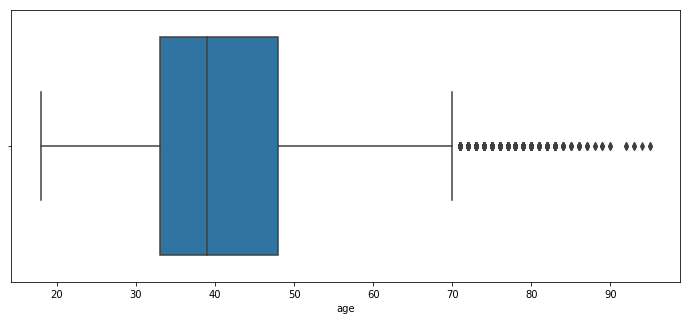

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(df.age)

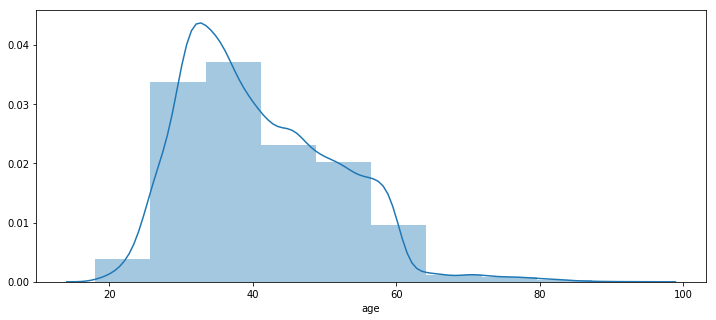

In [8]:
plt.figure(figsize=(12,5))

#Limitei a 10 bins para uma melhor visualização
sns.distplot(df.age, bins = 10)

#### Tipos de trabalho

In [9]:
#Agrupando e contando os tipos de trabalho
cont_jobs = df.job.value_counts().to_frame().reset_index()
cont_jobs.columns = ['jobs', 'total']
cont_jobs

,jobs,total
0,blue,9732
1,management,9458
2,technician,7597
3,admin,5171
4,services,4154
5,retired,2264
6,self,1579
7,entrepreneur,1487
8,unemployed,1303
9,housemaid,1240


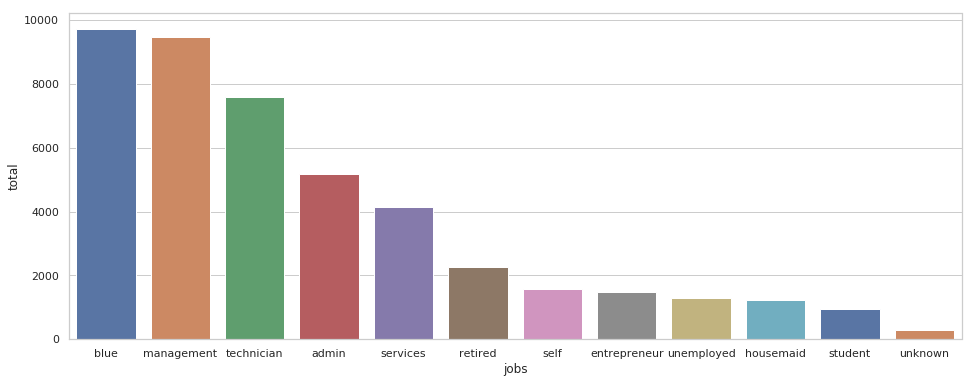

In [10]:
plt.figure(figsize=(16,6))
sns.set(style="whitegrid")
sns.barplot(x = 'jobs', y='total', palette = 'deep', data = pd.DataFrame(cont_jobs))

#### Estado Civil

```
60% das pessoas analisadas são casadas
```

In [11]:
#Agrupando e contando os tipos de trabalho
cont_marital = df.marital.value_counts().to_frame().reset_index()
cont_marital.columns = ['marital', 'total']
cont_marital

,marital,total
0,married,27214
1,single,12790
2,divorced,5207


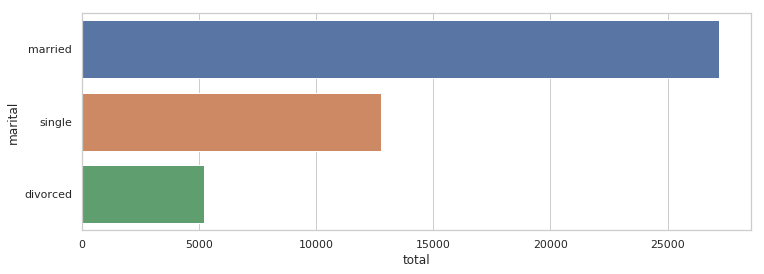

In [12]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.barplot(y = 'marital', x='total', palette = 'deep', data = pd.DataFrame(cont_marital))

([<matplotlib.patches.Wedge at 0x7f117cdf3278>,
 [Text(-0.34626600924200074, 1.0440784696772647, 'married'),
  Text(-0.04573369023536169, -1.099048874972108, 'single'),
  Text(1.028779331933144, -0.38937525112312166, 'divorced')],
 [Text(-0.1888723686774549, 0.5694973470966898, '60%'),
  Text(-0.024945649219288192, -0.5994812045302407, '28%'),
  Text(0.5611523628726239, -0.2123865006126118, '12%')])

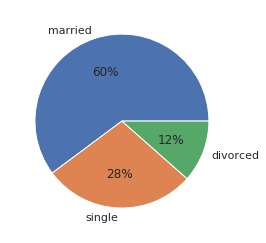

In [13]:
plt.pie(cont_marital.total, labels = cont_marital.marital, autopct='%.0f%%', shadow=False)

#### Educação

In [14]:
cont_edu = df.education.value_counts().to_frame().reset_index()
cont_edu.columns = ['education', 'total']
cont_edu

,education,total
0,secondary,23202
1,tertiary,13301
2,primary,6851
3,unknown,1857


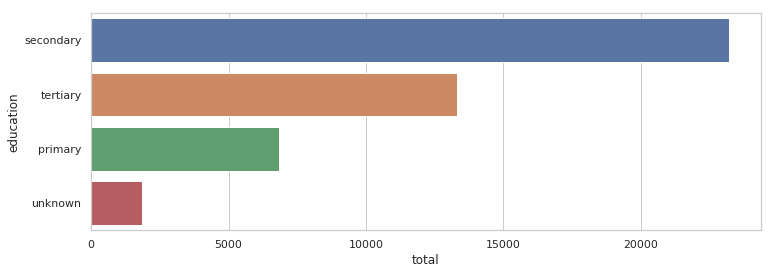

In [15]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.barplot(y = 'education', x='total', palette = 'deep', data = pd.DataFrame(cont_edu))

([<matplotlib.patches.Wedge at 0x7f117cd05470>,
 [Text(-0.04558098562748042, 1.0990552186988731, 'secondary'),
  Text(-0.5876997095948636, -0.9298435628330785, 'tertiary'),
  Text(0.8166522528681857, -0.7369390055393439, 'primary'),
  Text(1.0908547224334193, -0.1415484883165761, 'unknown')],
 [Text(-0.024862355796807498, 0.5994846647448397, '51%'),
  Text(-0.3205634779608347, -0.5071873979089518, '29%'),
  Text(0.44544668338264665, -0.4019667302941875, '15%'),
  Text(0.595011666781865, -0.07720826635449606, '4%')])

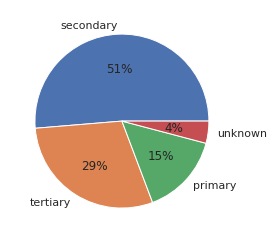

In [16]:
plt.pie(cont_edu.total, labels = cont_edu.education, autopct='%.0f%%', shadow=False)

#### Resultado da Campanha

```
Houve sucesso apenas em 12% dos casos
```

In [17]:
cont_res = df.y.value_counts().to_frame().reset_index()
cont_res.columns = ['Result', 'total']
cont_res

,Result,total
0,0,39922
1,1,5289


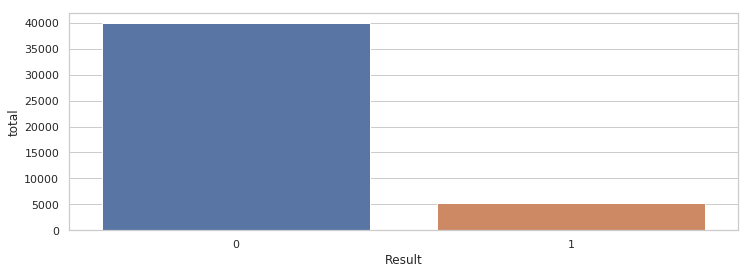

In [18]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.barplot(y = 'total', x='Result', palette = 'deep', data = pd.DataFrame(cont_res))

([<matplotlib.patches.Wedge at 0x7f117c9d50b8>,
 [Text(-1.0265439893343442, 0.3952308666609052, '0'),
  Text(1.0265440170874796, -0.39523079457691607, '1')],
 [Text(-0.5599330850914603, 0.21558047272413008, '88%'),
  Text(0.5599331002295342, -0.21558043340559055, '12%')])

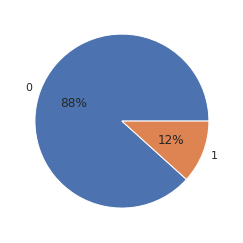

In [19]:
plt.pie(cont_res.total, labels = cont_res.Result, autopct='%.0f%%', shadow=False)

#### Visualização Geral - Barras

```
Consolidação geral
```

In [20]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow, typePlot):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            if(typePlot == 'bar'):
                valueCounts.plot.bar()
            elif(typePlot == 'pizza'):
                valueCounts.plot.pie(autopct='%.0f%%')
            else:
                print('Parametro incorreto!')
                
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

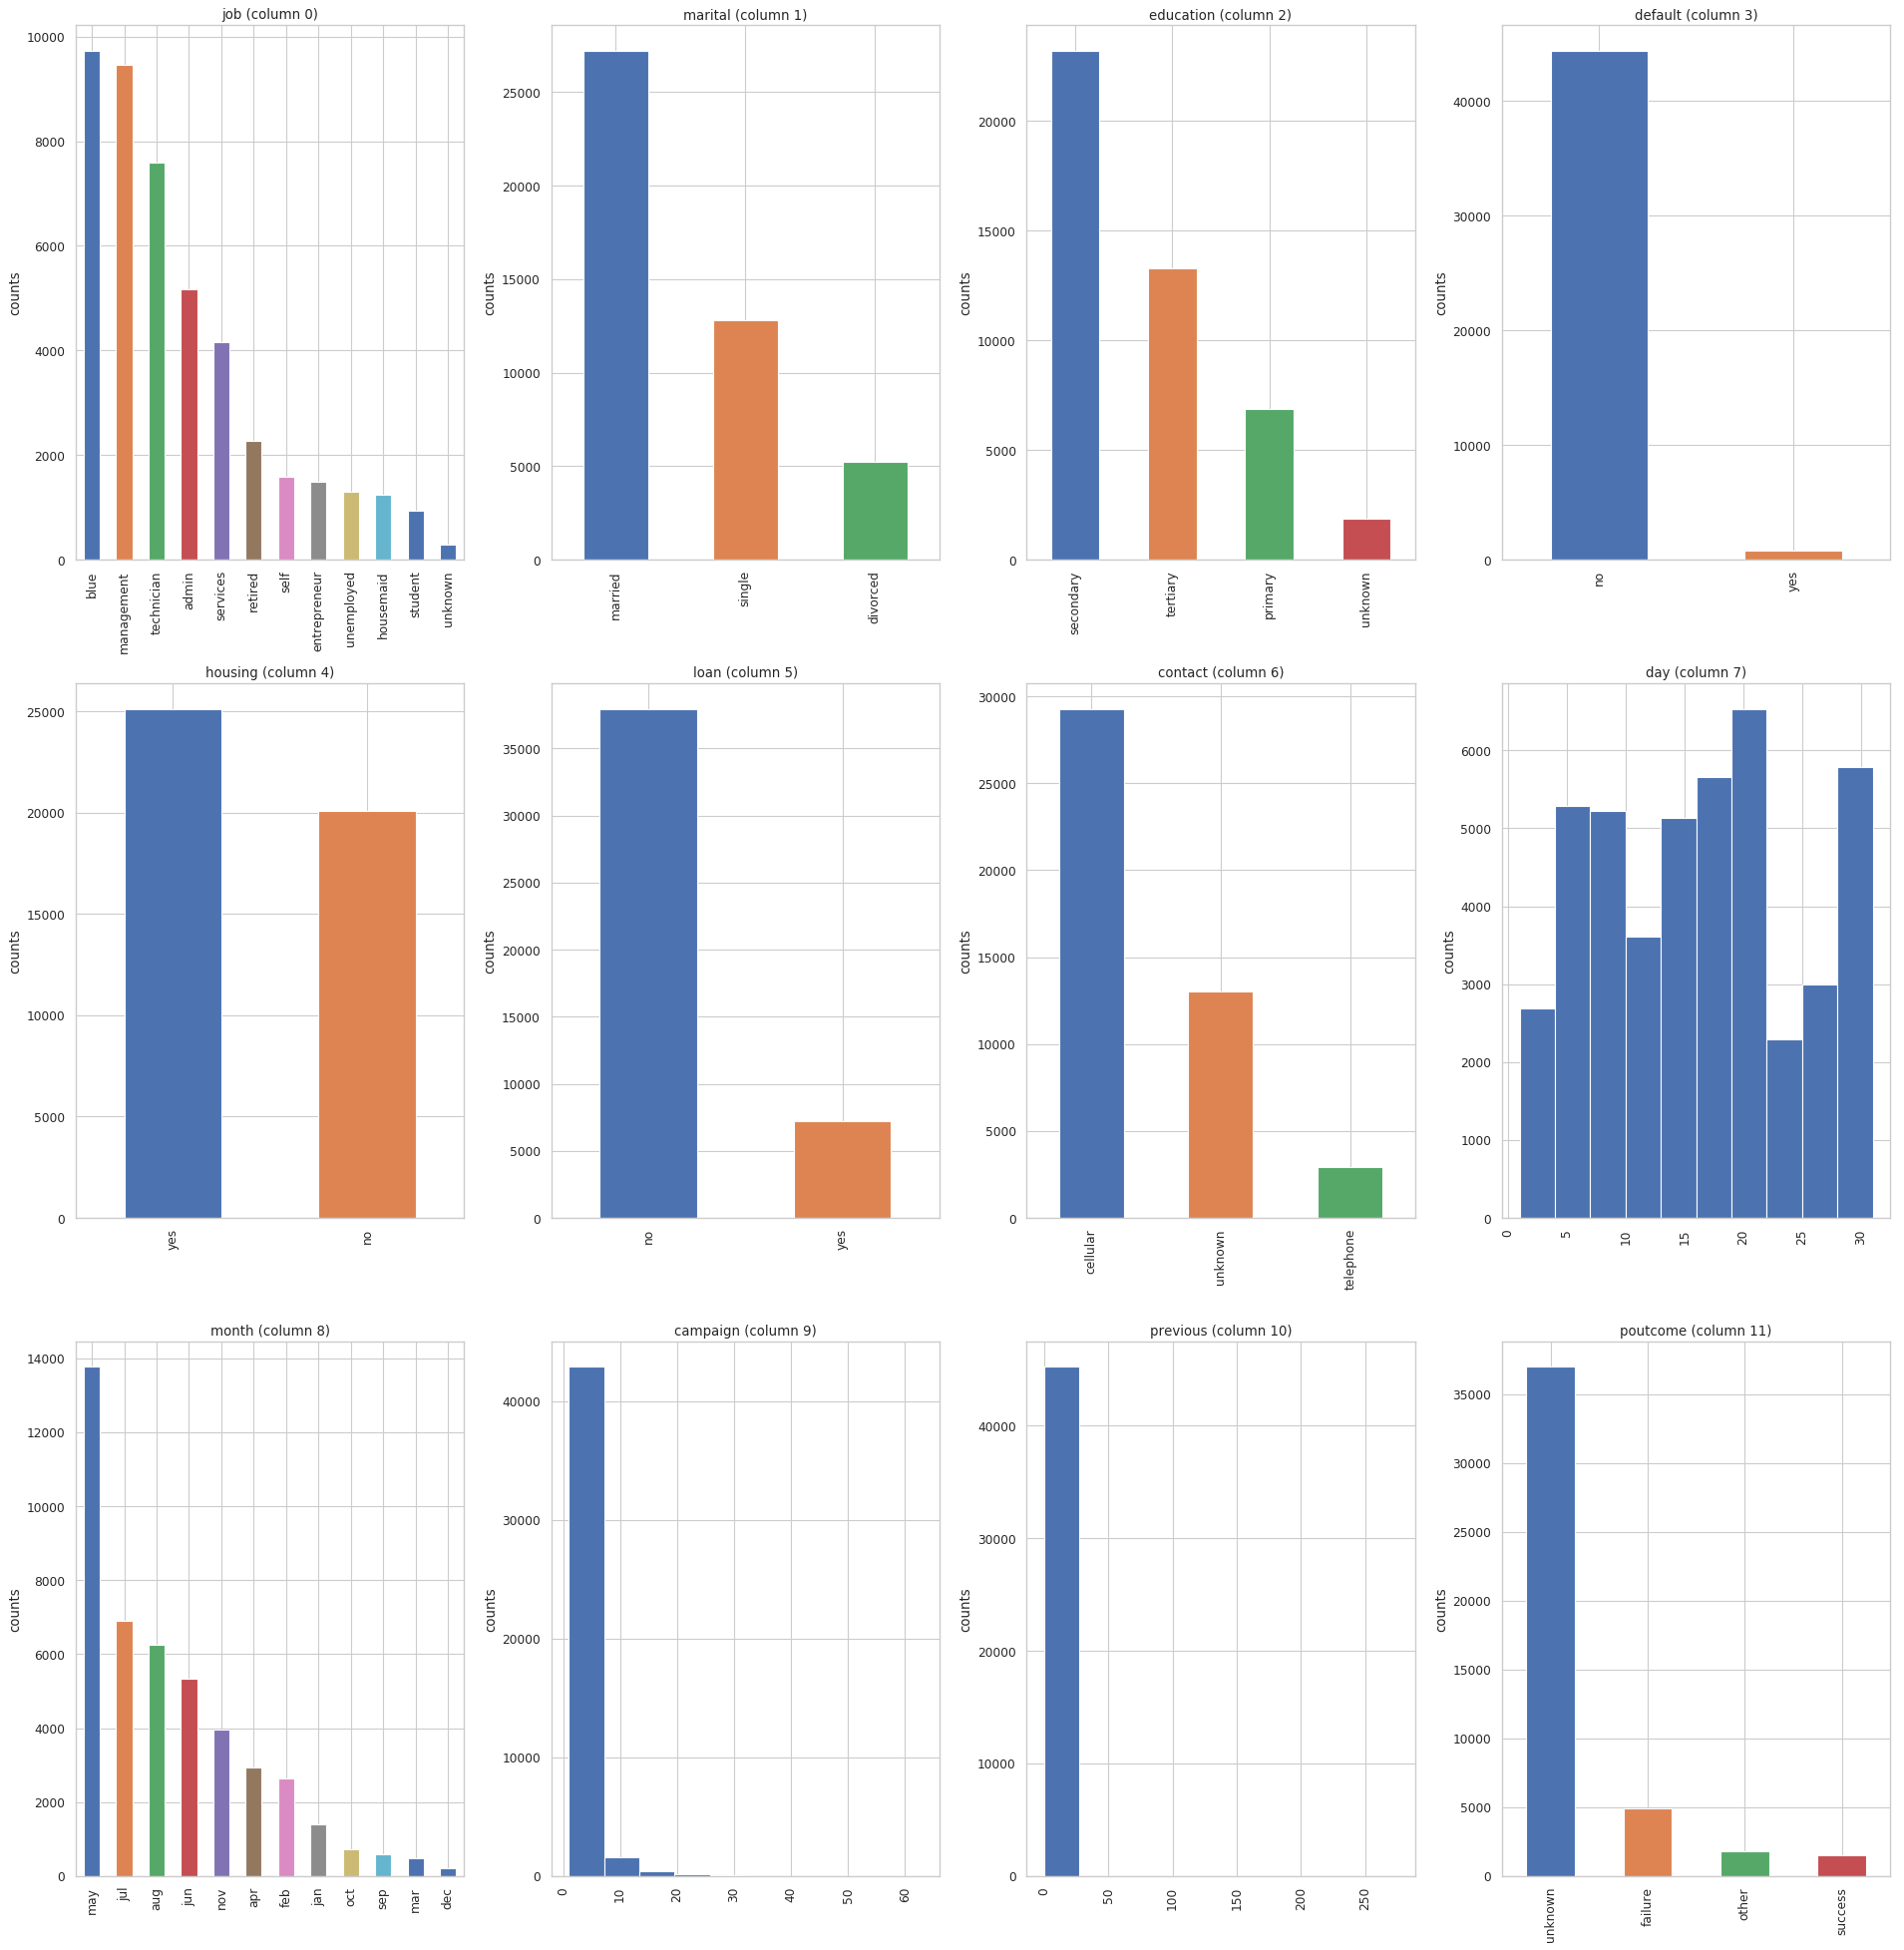

In [21]:
plotPerColumnDistribution(df, 12, 4, 'bar')

#### Visualização Geral - Pizza

Consolidação geral em pizza e suas respectivas %

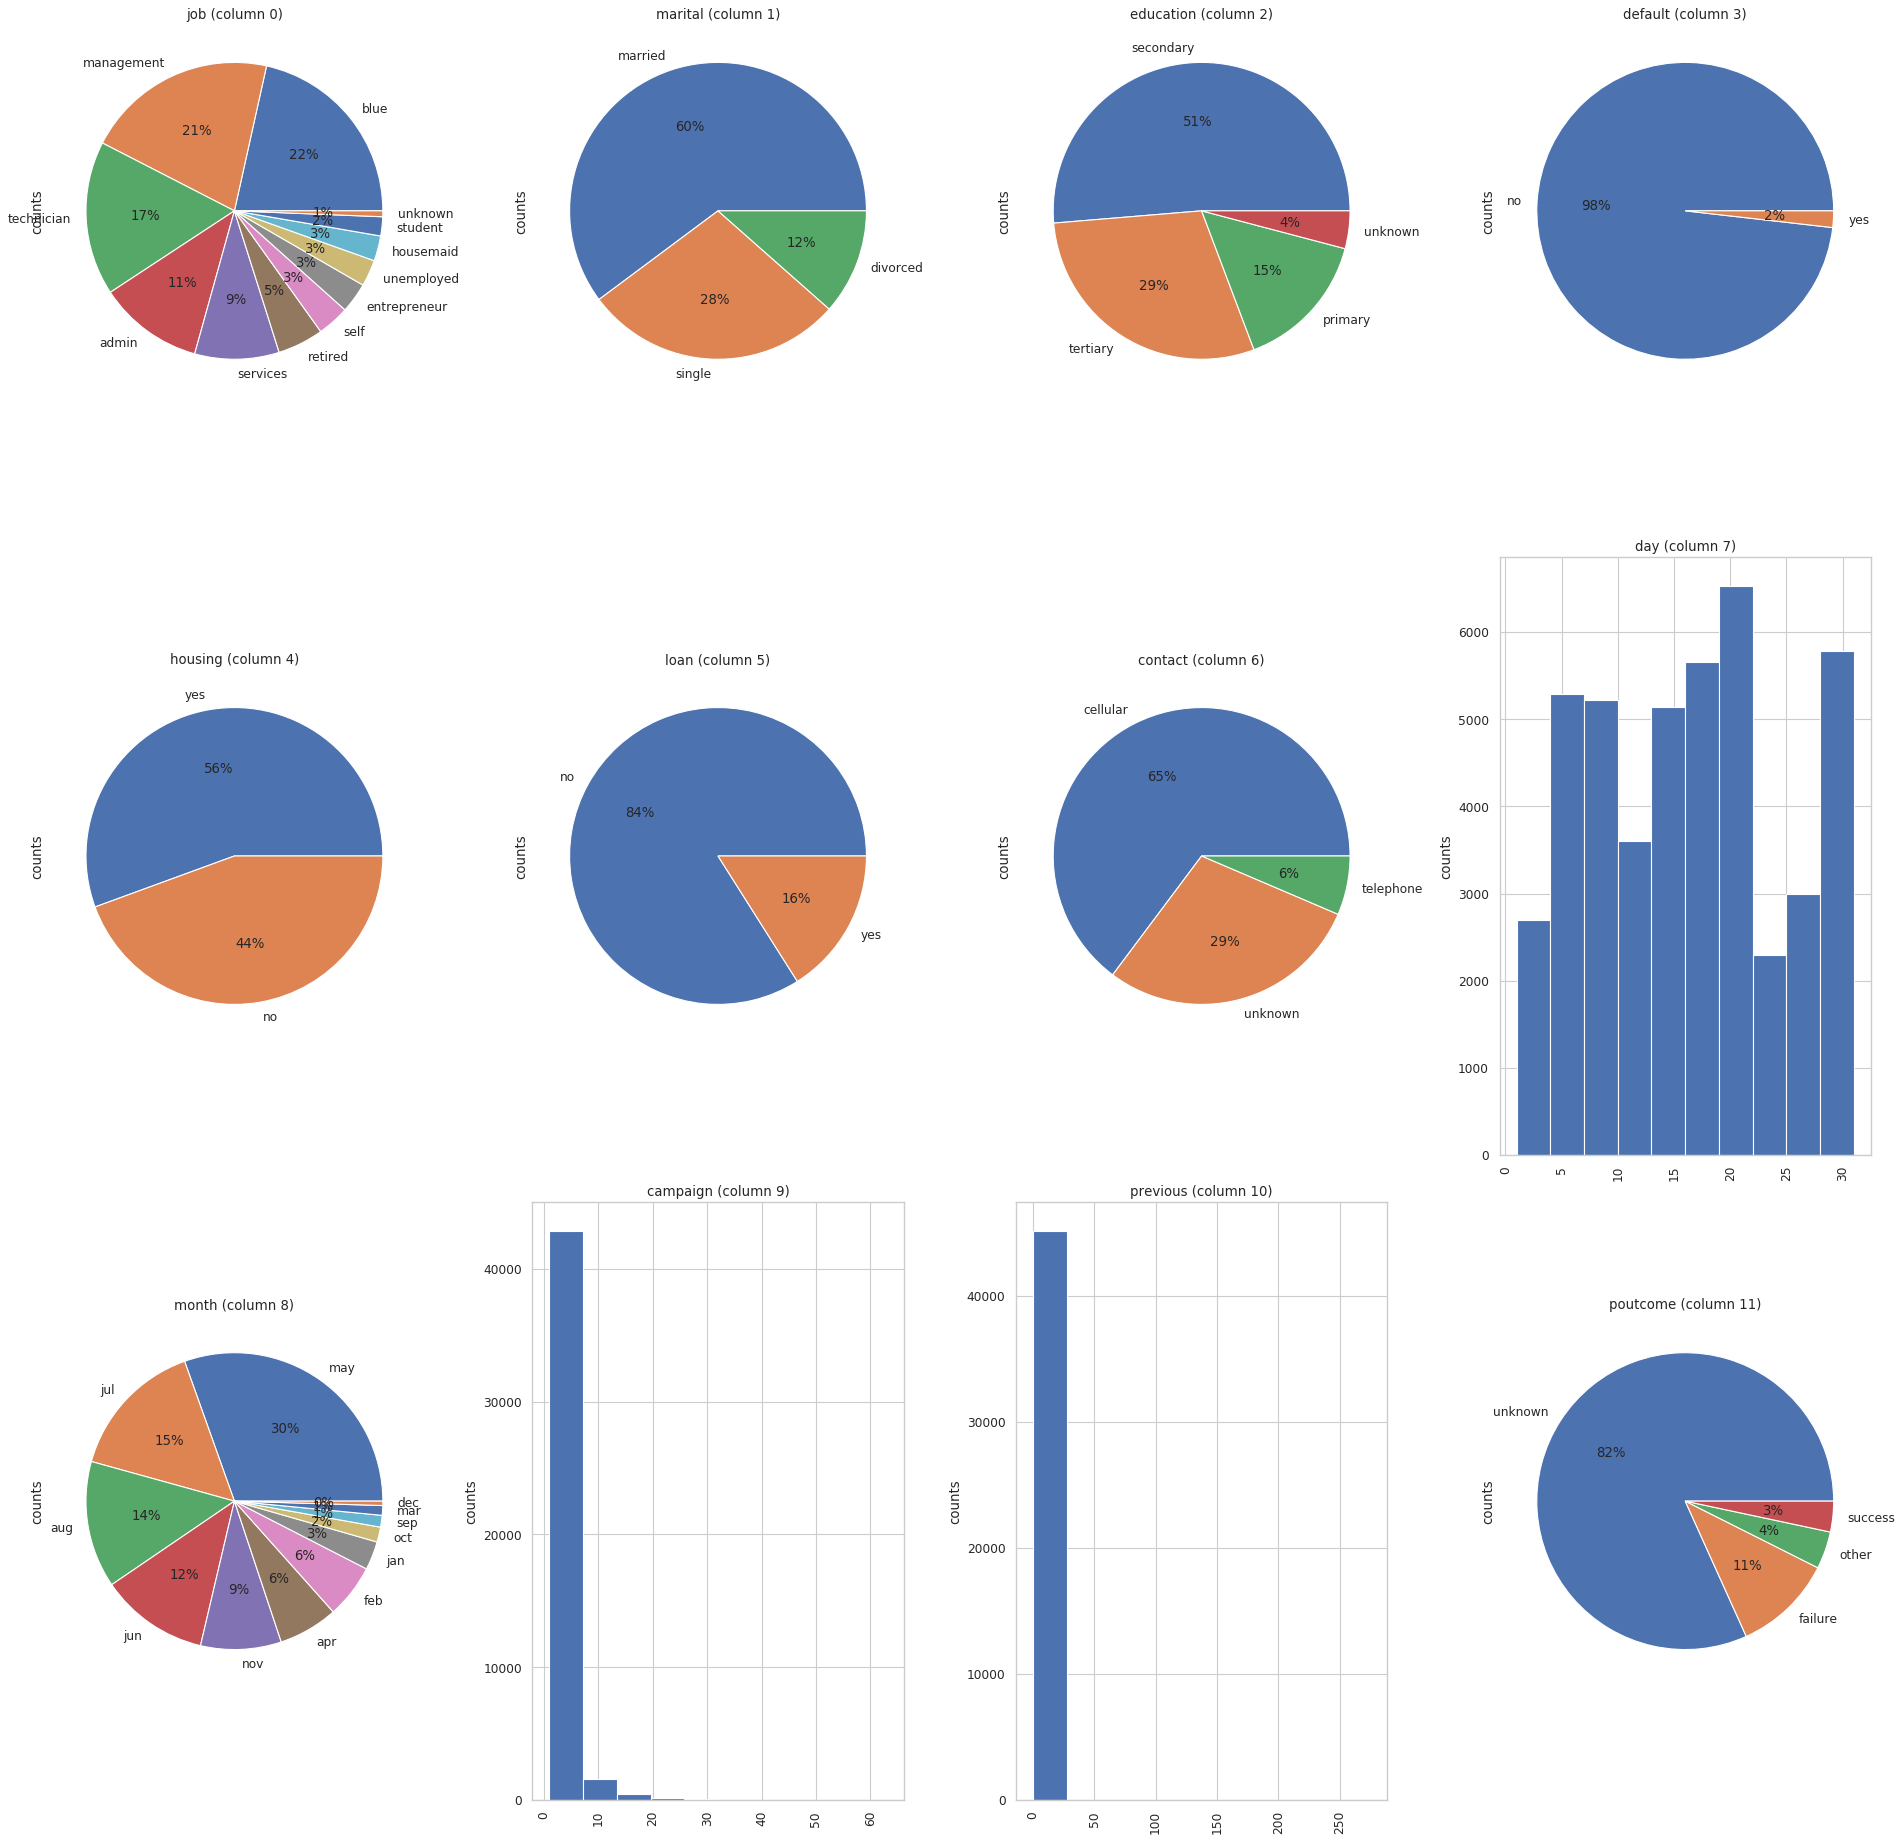

In [22]:
plotPerColumnDistribution(df, 12, 4, 'pizza')

#### Correlação dos dados

In [4]:
# Correlação dos dados
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [5]:
# Correlação dos dados --> Visualização com cores
df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,balance,day,duration,campaign,pdays,previous,y
age,1.0,0.098,-0.0091,-0.0046,0.0048,-0.024,0.0013,0.025
balance,0.098,1.0,0.0045,0.022,-0.015,0.0034,0.017,0.053
day,-0.0091,0.0045,1.0,-0.03,0.16,-0.093,-0.052,-0.028
duration,-0.0046,0.022,-0.03,1.0,-0.085,-0.0016,0.0012,0.39
campaign,0.0048,-0.015,0.16,-0.085,1.0,-0.089,-0.033,-0.073
pdays,-0.024,0.0034,-0.093,-0.0016,-0.089,1.0,0.45,0.1
previous,0.0013,0.017,-0.052,0.0012,-0.033,0.45,1.0,0.093
y,0.025,0.053,-0.028,0.39,-0.073,0.1,0.093,1.0


In [23]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=20)
    plt.show()

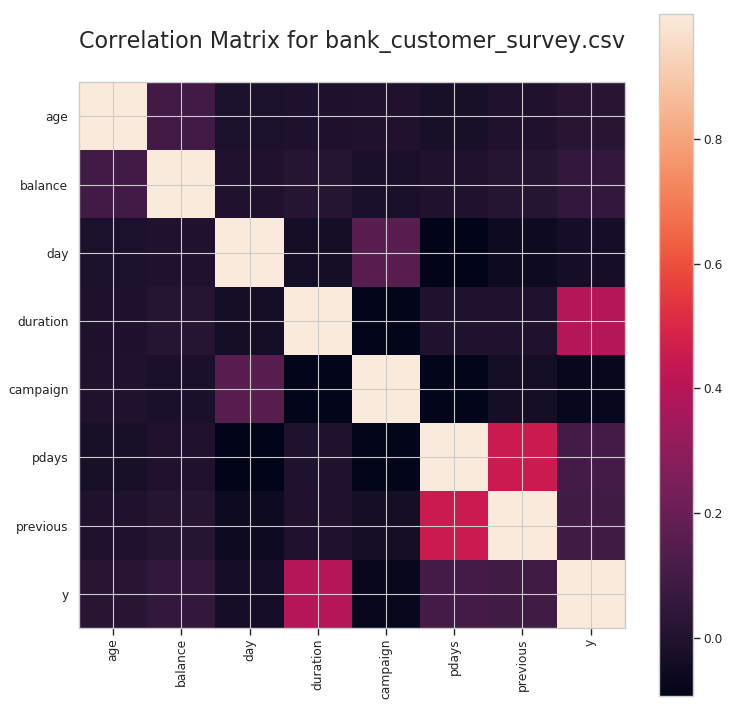

In [24]:
plotCorrelationMatrix(df, 11)

#### Dispersão e Densidade

In [25]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

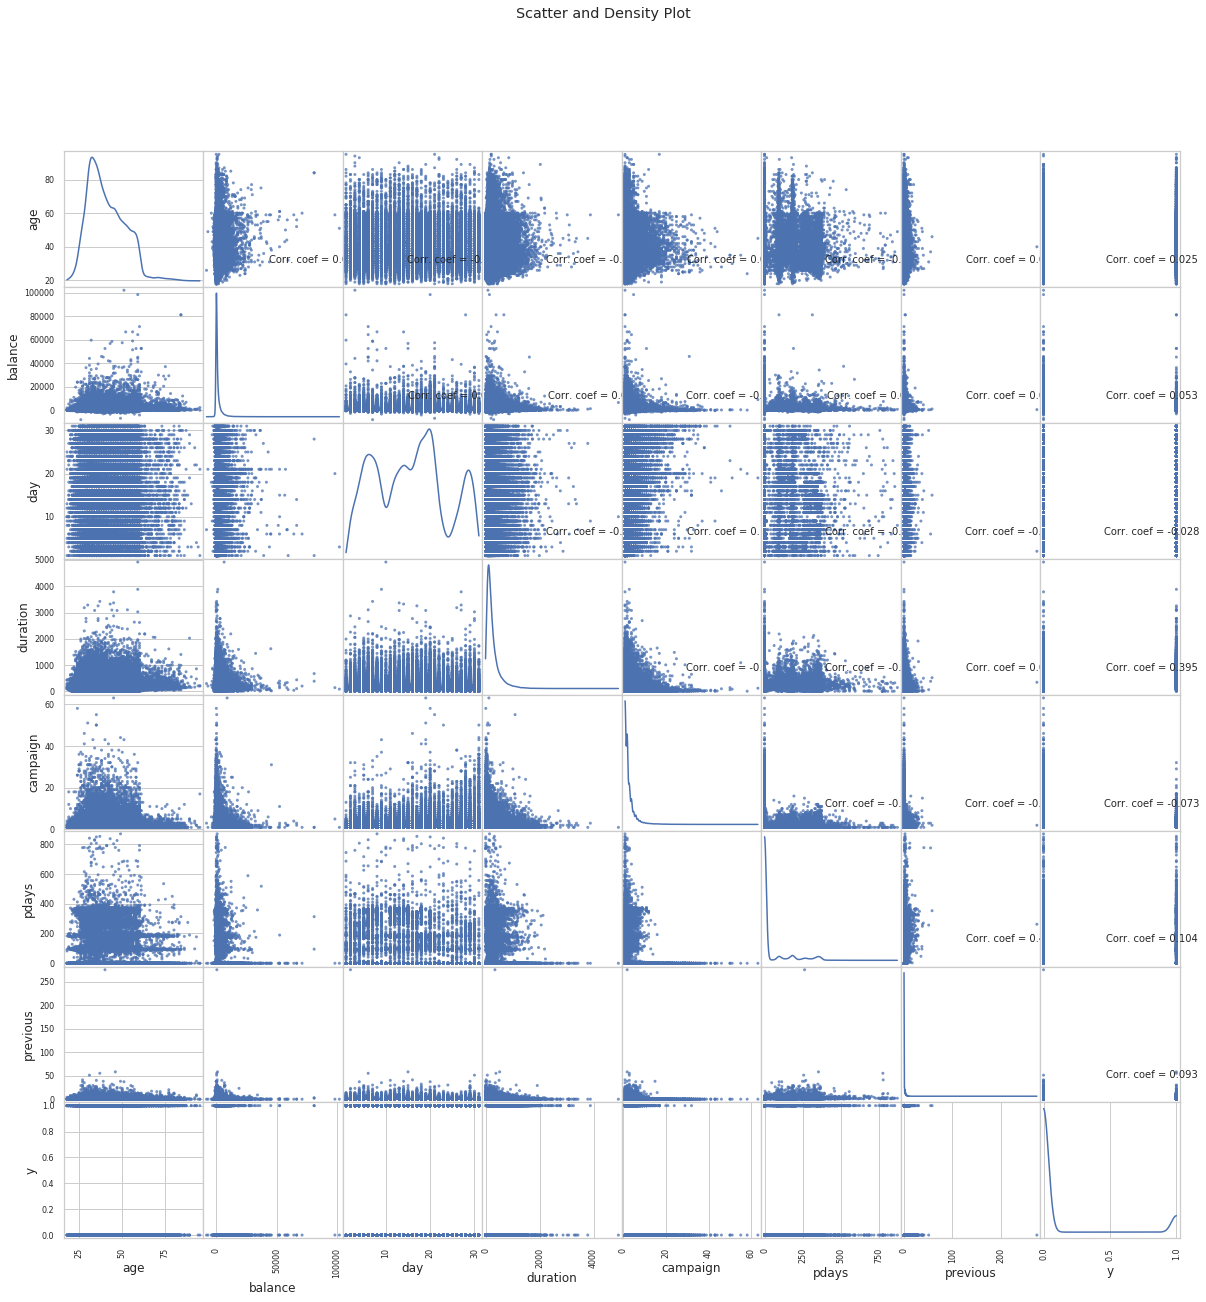

In [26]:
plotScatterMatrix(df, 20, 10)

## Conclusão

```
Estratégia de visualização:
    - Fiz a renderização dos principais elementos no gráfico de barra e de pizza com % separadamente
    - Após essa renderização específica, fiz a renderização de todos os elementos lado a lado
        * Para facilitar a comparação dos dados

    - Por fim a renderização de correlação
    - E a renderização de dispersão e densidade
    
Conclusão:
    - Com as visualizações indicadas, segue o perfil encontrado:
    
    >> Perfil
        * Idade entre 33 a 48 anos
        * Apenas 9% sem profissão (Estudantes, desempregados e etc)
        * 60% das pessoas analisadas são casadas
        * 98% sem credito pré-aprovado
        * 56% tem suas casas financiadas
        * 84% com algum tipo de empréstimo pessoal
        
    >> Contato
        * 65% dos contatos foram feitos para celulares
        * 30% dos contatos foram feitos em maio
        * Dia 20 foi o dia com mais contatos
        
    >> Resultado
        * 12% das pessoas fecharam o acordo
        
```

__Observações__

Função para definir o tamanho do grafico (*Usado para melhorar a disposição na tela*)
> plt.figure(figsize=(12,5))

## Fontes

__`URLs Acessadas em: 2019-12-12`__

### Dataset

https://www.kaggle.com/sharanmk/bank-marketing-term-deposit


### Libs

https://pandas.pydata.org/

https://seaborn.pydata.org/

https://matplotlib.org/

https://numpy.org/


### Kernel e material de apoio

https://www.kaggle.com/kerneler/starter-bank-customers-survey-862e9e3b-b

https://www.alura.com.br/curso-online-data-science-primeiros-passos